# HOOM

## Test Question:
#### What are all the factors that could influence residential home prices across the United States over the next decade? And how?

### About the Dataset
<br> **Dataset Used:**
<br> House Data
<br> **Description:**
<br> The dataset contains the details of house prices and the **Factors affecting the price** in the US.

### About the Assignment:
#### This assignment tries to find out the various factors affecting the price of the houses in the US.

### Description:

The algorithm used in the assignment is **GINI INDEX ALGORITHM**. This is the algorithm used in the **Decision Tree** models of Machine Learning.
<br>
<br>**What is GINI INDEX?**
<br>The Gini index measures the extent to which the distribution of income or consumption among individuals or households within an economy deviates from a perfectly equal distribution. A Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.

In [19]:
# Pandas library to handle the dataset

import pandas as pd

In [20]:
# Reading the dataset "House_data"
df = pd.read_csv('House_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Data Pre-processing:-

In [21]:
# Checking if there are any Null Values in the dataset...
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

As we see, our data is clean. So, we will move forward with the next step. In this step, we will optimise the dataset according to our use-case

We see the columns "sqft_basement"(i.e. Area of the basement) and "yr_renovated"(i.e. the year in which the house was last renovated). As far as the area of basement is concerned, it is of least importance. Rather, important feature is **whether the house was renovated or not.**
<br>In the same way, for the the 'Year renovated' column, more important feature is **whether the house is renovated or not.**
##### So, in the code below:-
- a new column "Basement" is added to the dataset.
- a new column "Renovated" is added to the dataset.

In [22]:
df['basement'] = (df['sqft_basement']>0).astype(int)
df['renovated'] = (df['yr_renovated']>0).astype(int)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,1,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,0,0
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,0,0
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,0,0
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,0,0


In [23]:
# Now we drop the unnecessary columns (including the "sqft_basement" and "yr_renovated" columns)...

to_drop = ['id', 'date', 'sqft_basement', 'yr_renovated']
df.drop(to_drop, axis = 1, inplace = True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,2009,98103,47.6993,-122.346,1530,1509,0,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,2014,98146,47.5107,-122.362,1830,7200,0,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,2009,98144,47.5944,-122.299,1020,2007,0,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,2004,98027,47.5345,-122.069,1410,1287,0,0


Now we come closer to our main project. **Gini Index** has already been discussed. Basically, it is the measure of randomness in any variable. For the sake of elaboration, we consider the following example:-

In [24]:

class_name = 'price'
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini

class_value_counts = df[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

Number of samples in each class is:
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

Gini Impurity of the class is 0.998


#### In the code above:-
- "Price" column is taken as an example.
- A function 'Gini Impurity' has been defined which is nothing but the **Randomness** of the house price.
- we see that the randomness is almost 100% (99.8%) which means that the price is changing for every introduced feature.
<br>
<br>Hence, using this concept, we can calculate the features/factors that influence the house price.

##### Finally, using the concepts of Gini Index, important factors are identified. In terms of Machine Learning, it is called **ROOT NODES**.

In [25]:

class_name = 'price'

attribute_names = [ 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                    'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
                    'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement', 'renovated']
def gini_in(attribute_name):
    attribute_values = df[attribute_name].value_counts()
    gini_A = 0 
    for key in attribute_values.keys():
        df_k = df[class_name][df[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_in(key)
    print(f'Gini Index for {key} is {gini_attiribute[key]:.3f}')

Gini Index for price is 0.000
Gini Index for bedrooms is 0.997
Gini Index for bathrooms is 0.996
Gini Index for sqft_living is 0.949
Gini Index for sqft_lot is 0.546
Gini Index for floors is 0.997
Gini Index for waterfront is 0.998
Gini Index for view is 0.998
Gini Index for condition is 0.998
Gini Index for grade is 0.997
Gini Index for sqft_above is 0.954
Gini Index for yr_built is 0.992
Gini Index for zipcode is 0.993
Gini Index for lat is 0.764
Gini Index for long is 0.963
Gini Index for sqft_living15 is 0.961
Gini Index for sqft_lot15 is 0.595
Gini Index for basement is 0.998
Gini Index for renovated is 0.998


### In the code above:-
The **House price** is taken as the reference point. The Gini Index of rest of the features will act as the 'impact' of those features over the House price. Hence, the more is the Gini Index, the more impactfull the correspong feature will be.
#### Following features have more than 99% impact on the House price
1. **Number of bedrooms in the house**
2. **Number of bathrooms in the house**
3. **Number of floors**
5. **Waterfront Availability**
6. **View of the house**
7. **Present Condition of the house**
8. **Grading of the house**
9. **Year of construction**
10. **ZIP Code**
11. **Availibility of Basement**
12. **Whether renovated of not**

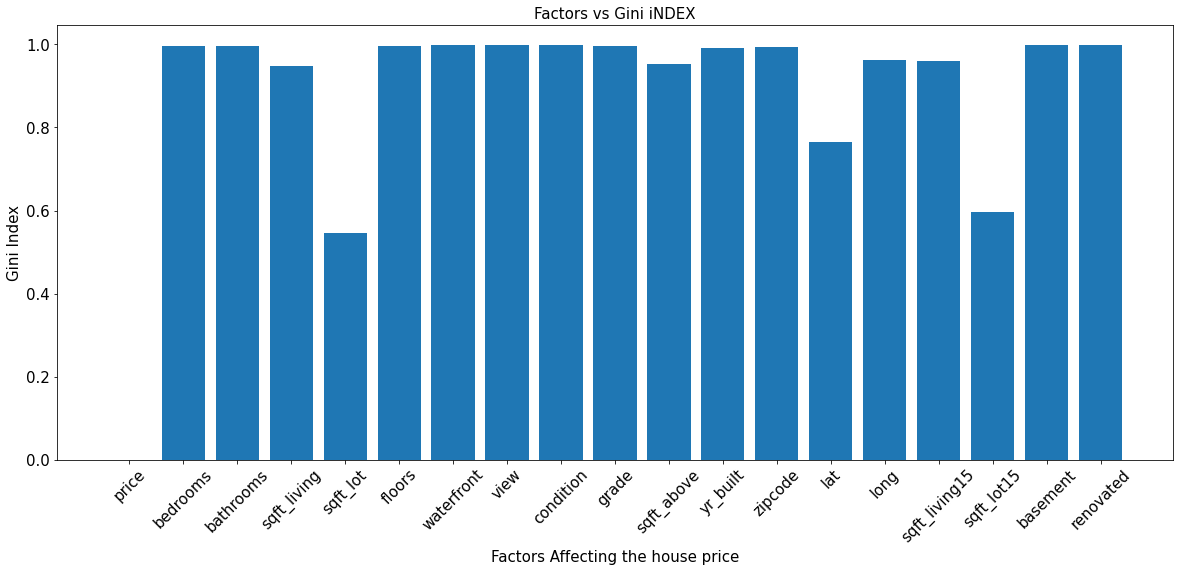

In [34]:
# Visualising the output using the bar plot...


plt.figure(figsize = (20,8))
plt.bar(attribute_names ,gini_attiribute.values())
plt.title('Factors vs Gini iNDEX', size = 15)

plt.xlabel('Factors Affecting the house price', size = 15)
plt.ylabel('Gini Index', size = 15)

plt.xticks(size = 15, rotation=45)
plt.yticks(size = 15)

plt.show()